In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from BNN_SVI import BNN_SVI
import pyro

dataset_name = 'concrete'
dataset_dir  = 'UCI_Datasets/' + dataset_name + "/data/"
data         = np.loadtxt(dataset_dir + "data.txt")
feature_id   = np.loadtxt(dataset_dir + "index_features.txt", dtype=int)
target_id    = np.loadtxt(dataset_dir + "index_target.txt", dtype = int)
xs           = data[:,feature_id]
ys           = data[:,target_id][:,None]

split_id = 4
train_id = np.loadtxt(dataset_dir + "index_train_{}".format(split_id) + ".txt", dtype = int)
test_id  = np.loadtxt(dataset_dir + "index_test_{}".format(split_id) + ".txt", dtype = int)

train_x = xs[train_id]
train_y = ys[train_id]
test_x  = xs[test_id]
test_y  = ys[test_id]
dim     = train_x.shape[1]

train_x = torch.FloatTensor(train_x)
train_y = torch.FloatTensor(train_y)
test_x  = torch.FloatTensor(test_x)
test_y  = torch.FloatTensor(test_y)

#pyro.enable_validation(True)


In [2]:
conf    = dict()
conf['batch_size'] = 256
conf['lr'] = 1e-2
conf['weight_prior'] = 1
conf['bias_prior'] = 1
conf['prec_alpha'] = 50
conf['prec_beta']   = 10
conf['print_every'] = 1
conf['num_layers'] = 3
conf['num_iters'] = 2000
conf['print_every'] = 50
model = BNN_SVI(dim = dim, act = nn.Tanh(), conf = conf)


[Iteration 00001] loss: 2808.1613
[Iteration 00051] loss: 3765.7345
[Iteration 00101] loss: 1894.0032
[Iteration 00151] loss: 919.9621
[Iteration 00201] loss: 1411.5602
[Iteration 00251] loss: 588.9400
[Iteration 00301] loss: 823.3557
[Iteration 00351] loss: 282.5924
[Iteration 00401] loss: 372.6004
[Iteration 00451] loss: 318.8441
[Iteration 00501] loss: 327.4979
[Iteration 00551] loss: 266.2891
[Iteration 00601] loss: 138.6727
[Iteration 00651] loss: 142.8805
[Iteration 00701] loss: 108.9024
[Iteration 00751] loss: 150.8670
[Iteration 00801] loss: 257.8754
[Iteration 00851] loss: 116.5925
[Iteration 00901] loss: 130.7874
[Iteration 00951] loss: 98.6617
[Iteration 01001] loss: 83.4380
[Iteration 01051] loss: 143.9066
[Iteration 01101] loss: 159.5705
[Iteration 01151] loss: 174.0644
[Iteration 01201] loss: 92.7317
[Iteration 01251] loss: 73.9505
[Iteration 01301] loss: 208.1092
[Iteration 01351] loss: 65.2759
[Iteration 01401] loss: 109.6923
[Iteration 01451] loss: 53.3013
[Iteration 0

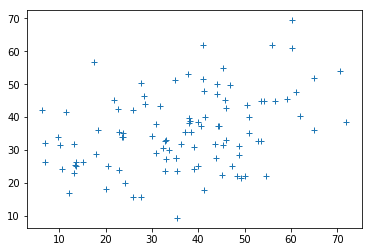

In [3]:
model.train(train_x, train_y)
r_net = model.sample()
py =model.sample_predict(r_net, test_x)
rmse = torch.sqrt(nn.MSELoss()(py, test_y))
print('RMSE on test data: %g' % rmse)
plt.plot(test_y.numpy(), py.detach().numpy(), '+')

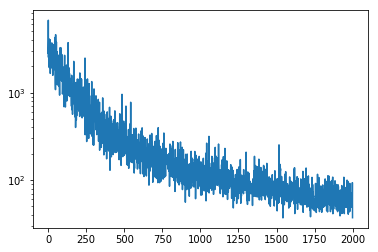

In [4]:
plt.semilogy(model.rec)

In [23]:
help(pyro.infer.SVI)

Help on class SVI in module pyro.infer.svi:

class SVI(pyro.infer.abstract_infer.TracePosterior)
 |  :param model: the model (callable containing Pyro primitives)
 |  :param guide: the guide (callable containing Pyro primitives)
 |  :param optim: a wrapper a for a PyTorch optimizer
 |  :type optim: pyro.optim.PyroOptim
 |  :param loss: an instance of a subclass of :class:`~pyro.infer.elbo.ELBO`.
 |      Pyro provides three built-in losses:
 |      :class:`~pyro.infer.trace_elbo.Trace_ELBO`,
 |      :class:`~pyro.infer.tracegraph_elbo.TraceGraph_ELBO`, and
 |      :class:`~pyro.infer.traceenum_elbo.TraceEnum_ELBO`.
 |      See the :class:`~pyro.infer.elbo.ELBO` docs to learn how to implement
 |      a custom loss.
 |  :type loss: pyro.infer.elbo.ELBO
 |  :param num_samples: the number of samples for Monte Carlo posterior approximation
 |  :param num_steps: the number of optimization steps to take in ``run()``
 |  
 |  A unified interface for stochastic variational inference in Pyro. The

tensor(43.8200, grad_fn=<SqrtBackward>)

(array([9.939e+03, 4.500e+01, 1.000e+01, 5.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([  1.5044632 ,  44.11362381,  86.72278442, 129.33194504,
        171.94110565, 214.55026627, 257.15942688, 299.76858749,
        342.37774811, 384.98690872, 427.59606934]),
 <a list of 10 Patch objects>)

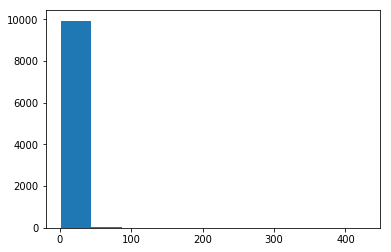

In [18]:
alpha = pyro.param("alpha")
beta   = pyro.param("beta")
prec_dist = pyro.distributions.Gamma(alpha, beta)
prec_samples = prec_dist.sample((10000,))
var_samples = 1/prec_samples
std_samples = var_samples.sqrt()
plt.hist(std_samples.numpy())

In [19]:
alpha

tensor(1.0949, grad_fn=<AddBackward0>)

In [20]:
beta

tensor(21.0269, grad_fn=<AddBackward0>)

In [22]:
std_samples.var()

tensor(78.3262)